# Exploratory Data Analysis on COVID-19

## ABSTRACT

The project is entitled “Exploratory Data Analysis on COVID-19”. This data is taken from Kaggle, This dataset has daily level information on the number of affected cases, deaths and recovery from 2019 novel coronavirus. Please note that this is a time series data and so the number of cases on any given day is the cumulative number. The data is available from 22 Jan, 2020. Focus on the areas most affected and taking the required precautions to control the spreading of the virus.

Coronavirus disease 2019 (COVID-19), a highly infectious disease, was first detected in Wuhan, China, in December 2019. The disease has spread to 212 countries and territories around the world and infected (confirmed) more than 4.8 million people. In India, the disease was first detected on 30 January 2020 in Kerala in a student who returned from Wuhan. The total (cumulative) number of confirmed infected people is more than one lakh till now across India (19 May 2020). In this project, we will focus the infected people worldwide and India.

In [1]:
# Import required libreries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import datetime
import matplotlib.dates as mdates
import plotly.express as px
#import plotly.offline as py
#import plotly.graph_objects as go
#import plotly.express

Pandas & Numpy : Pandas used to perform in dataframe & Numpy is used for linear algebra
method.
Visualization Packages : Visualization packages to plot the data. matplotlib.pyplot, seaborn

In [2]:
# Import data  
df= pd.read_csv('F:/studies/project/New folder/covid_19_data.csv')
confirmed_df= pd.read_csv('F:/studies/project/New folder/confirmed.csv')
deaths_df= pd.read_csv('F:/studies/project/New folder/deaths.csv')
recoveries_df= pd.read_csv('F:/studies/project/New folder/recovered.csv')
covid19India=pd.read_csv('F:/studies/project/New folder/covid_19_india.csv')
ageGroup=pd.read_csv('F:/studies/project/New folder/AgeGroupDetails.csv')
indiDetails=pd.read_csv('F:/studies/project/New folder/IndividualDetails.csv')
hospital_beds=pd.read_csv('F:/studies/project/New folder/HospitalBedsIndia.csv')

In [3]:
df = df.rename(columns={'Province/State': 'Province','Country/Region':'Country','ObservationDate':'Date'})
covid19India=covid19India.rename(columns={'State/UnionTerritory':'State'})

In [4]:
# Sample Data
df.head()

,SNo,Date,Province,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [5]:
covid19India.head()

,Sno,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


This is the first 5 rows smaple data from the dataset.

In [6]:
# Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SNo,77467.0,38734.000000,22362.940989,1.0,19367.5,38734.0,58100.5,77467.0
Confirmed,77467.0,11807.370881,35795.251718,0.0,132.0,1154.0,6198.0,552318.0
Deaths,77467.0,600.764958,2569.398570,0.0,1.0,21.0,196.0,41584.0
Recovered,77467.0,5745.271161,32337.841600,0.0,1.0,167.0,1842.0,1461885.0


In [7]:
# Renaming the column names
df.Country.replace({'Mainland China': 'China'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df['Last Update'] = pd.to_datetime(df['Last Update'])
df.drop(list(df[df.Confirmed==0.0].index), axis = 0, inplace=True)
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.week
df['WeekDay'] = df['Date'].dt.weekday

In [8]:
# Sum of the null vallues
df.isnull().sum()

SNo                0
Date               0
Province       26403
Country            0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
Day                0
Month              0
Week               0
WeekDay            0
dtype: int64

In [9]:
# Missing data of each country
dfmissing=df[df['Province'].isnull()]['Country'].value_counts().to_frame(name='Missing_Province_count')
dfcountry=df['Country'].value_counts().to_frame(name='Country_count')
mergedDf = dfcountry.merge(dfmissing, left_index=True, right_index=True)

In [10]:
mergedDf[mergedDf.Missing_Province_count>1]

,Country_count,Missing_Province_count
Russia,5268,122
Japan,3299,127
Mexico,2450,82
Colombia,2284,83
Brazil,2082,84
India,2034,132
Italy,1784,104
Ukraine,1764,90
Peru,1735,83
UK,1700,121


In [11]:
df[df.Country=='Australia']=df[df.Country=='Australia'].fillna(df[df.Country=='Australia']["Province"].mode()[0])
df["Province"]=df["Province"].fillna(df["Country"])

In [12]:
df.sort_values(by='Confirmed', ascending=False)['Country'].unique()

array(['Brazil', 'US', 'South Africa', 'India', 'Russia', 'Iran', 'UK',
       'Saudi Arabia', 'Chile', 'Bangladesh', 'Spain', 'Turkey', 'Italy',
       'Peru', 'France', 'Argentina', 'Germany', 'Iraq', 'Pakistan',
       'Qatar', 'Indonesia', 'Colombia', 'Philippines', 'Egypt',
       'Kazakhstan', 'Ecuador', 'Oman', 'Bolivia', 'Mexico', 'Israel',
       'Dominican Republic', 'Belgium', 'China', 'Belarus', 'Kuwait',
       'Panama', 'United Arab Emirates', 'Canada', 'Singapore', 'Romania',
       'Netherlands', 'Portugal', 'Guatemala', 'Poland', 'Nigeria',
       'Honduras', 'Sweden', 'Bahrain', 'Armenia', 'Ghana', 'Afghanistan',
       'Kyrgyzstan', 'Switzerland', 'Azerbaijan', 'Algeria', 'Ireland',
       'Serbia', 'Moldova', 'Morocco', 'Uzbekistan', 'Ukraine', 'Kenya',
       'Austria', 'Nepal', 'Venezuela', 'Costa Rica', 'Ethiopia',
       'Cameroon', 'El Salvador', 'Czech Republic', 'Japan',
       'Ivory Coast', 'South Korea', 'Denmark', 'West Bank and Gaza',
       'Bosnia and 

In [13]:
# Country named as others
df[df.Country=='Others']

,SNo,Date,Province,Country,Last Update,Confirmed,Deaths,Recovered,Day,Month,Week,WeekDay
933,934,2020-02-07,Cruise Ship,Others,2020-02-07 16:33:03,61.0,0.0,0.0,7,2,6,4
1005,1006,2020-02-08,Cruise Ship,Others,2020-02-07 16:33:03,61.0,0.0,0.0,8,2,6,5
1077,1078,2020-02-09,Diamond Princess cruise ship,Others,2020-02-09 06:13:11,64.0,0.0,0.0,9,2,6,6
1143,1144,2020-02-10,Diamond Princess cruise ship,Others,2020-02-10 16:03:12,135.0,0.0,0.0,10,2,7,0
1215,1216,2020-02-11,Diamond Princess cruise ship,Others,2020-02-10 16:03:12,135.0,0.0,0.0,11,2,7,1
1286,1287,2020-02-12,Diamond Princess cruise ship,Others,2020-02-12 04:23:38,175.0,0.0,0.0,12,2,7,2
1359,1360,2020-02-13,Diamond Princess cruise ship,Others,2020-02-12 04:23:38,175.0,0.0,0.0,13,2,7,3
1433,1434,2020-02-14,Diamond Princess cruise ship,Others,2020-02-14 00:13:23,218.0,0.0,0.0,14,2,7,4
1506,1507,2020-02-15,Diamond Princess cruise ship,Others,2020-02-15 17:03:04,285.0,0.0,0.0,15,2,7,5
1578,1579,2020-02-16,Diamond Princess cruise ship,Others,2020-02-16 03:43:02,355.0,0.0,0.0,16,2,7,6


In [14]:
df.Country.replace({'Others': 'Japan'}, inplace=True)

In [15]:
print("Total number of countries with Disease Spread: ",len(df["Country"].unique()))

Total number of countries with Disease Spread:  222


In [16]:
dftotal=df.groupby(['Date','Country'])['Confirmed','Deaths','Recovered'].sum()
dftotal.reset_index(inplace=True)  
dftotal['Death_rate']=dftotal['Deaths']/dftotal['Confirmed']
dftotal['Recovery_rate']=dftotal['Recovered']/dftotal['Confirmed']

In [17]:
dftotal.head()

,Date,Country,Confirmed,Deaths,Recovered,Death_rate,Recovery_rate
0,2020-01-22,China,547.0,17.0,28.0,0.031079,0.051188
1,2020-01-22,Japan,2.0,0.0,0.0,0.000000,0.000000
2,2020-01-22,Macau,1.0,0.0,0.0,0.000000,0.000000
3,2020-01-22,South Korea,1.0,0.0,0.0,0.000000,0.000000
4,2020-01-22,Taiwan,1.0,0.0,0.0,0.000000,0.000000


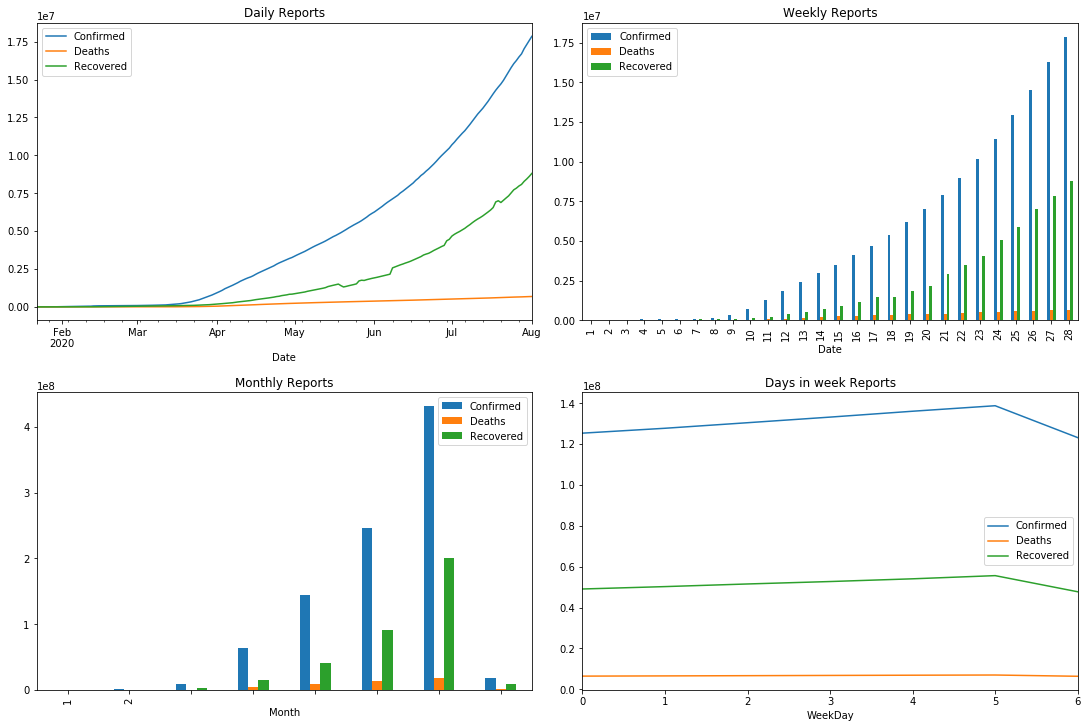

In [18]:
# Graphs based on daily, monthly, weekly and weekdays reports of (Confirmed, Deaths & Recovered)
displayed_cols = ['Confirmed','Deaths','Recovered']
def multi_plot():
    fig = plt.figure(constrained_layout=True, figsize=(15,10))
    grid = gridspec.GridSpec(ncols=4, nrows=2, figure=fig)

    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Daily Reports')
    df.groupby(['Date']).sum()[displayed_cols].plot(ax=ax1)
    
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('Monthly Reports')
    df.groupby(['Month']).sum()[displayed_cols].plot(kind='bar',ax=ax2)
    ax2.set_xticklabels(range(1,3))

    ax3= fig.add_subplot(grid[0, 2:])
    ax3.set_title('Weekly Reports')
    weekdays = df.groupby('Week').nth(-1)['Date']
    df[df['Date'].isin(weekdays)].groupby('Date')[displayed_cols].sum().plot(kind='bar',ax=ax3)
    ax3.set_xticklabels(range(1,len(weekdays)+1))
    
    ax4 = fig.add_subplot(grid[1, 2:])
    ax4.set_title('Days in week Reports')
    df.groupby(['WeekDay']).sum()[displayed_cols].plot(ax=ax4)
    plt.show()
multi_plot()

In [19]:
recent_date = df['Date'].iloc[-1]
last_updated = df[df['Date'].dt.date == recent_date]

In [20]:
# Reports given for the total number of days
df['Date'].max()-df['Date'].min()

Timedelta('192 days 00:00:00')

In [21]:
pd.DataFrame(df['Country'].value_counts()).head()

,Country
US,9057
China,5965
Russia,5268
Japan,3345
Mexico,2450


In [22]:
df['Last Update'].max()

Timestamp('2020-08-02 04:34:47')

In [23]:
confirmed_ww=confirmed_df.iloc[:,4:]
confirmed_ww.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20
0,0,0,0,0,0,0,0,0,0,0,...,35928,35981,36036,36157,36263,36368,36471,36542,36675,36710
1,0,0,0,0,0,0,0,0,0,0,...,4466,4570,4637,4763,4880,4997,5105,5197,5276,5396
2,0,0,0,0,0,0,0,0,0,0,...,25484,26159,26764,27357,27973,28615,29229,29831,30394,30950
3,0,0,0,0,0,0,0,0,0,0,...,889,897,897,897,907,907,918,922,925,925
4,0,0,0,0,0,0,0,0,0,0,...,851,880,916,932,950,1000,1078,1109,1148,1164


In [24]:
# Confirmed cases on each day (Head)
daily_cases=confirmed_ww.sum(axis=0)
daily_cases.head(10)

1/22/20     555
1/23/20     654
1/24/20     941
1/25/20    1434
1/26/20    2118
1/27/20    2927
1/28/20    5578
1/29/20    6166
1/30/20    8234
1/31/20    9927
dtype: int64

In [25]:
# Confirmed cases on each day (Tail)
daily_cases=daily_cases.diff().fillna(daily_cases[0]).astype(np.int64)
daily_cases.tail(10)

7/23/20    282756
7/24/20    281165
7/25/20    255545
7/26/20    205099
7/27/20    234635
7/28/20    252337
7/29/20    289149
7/30/20    276762
7/31/20    286051
8/1/20     257875
dtype: int64

In [26]:
#daily_cases.columns=['Date','cases']

In [27]:
#daily_cases

In [28]:
a= df.groupby(["Date","Country"])[['Date','Country','Confirmed','Deaths','Recovered']].sum().reset_index()
sorted_By_Confirmed=a.sort_values('Confirmed',ascending=False)
sorted_By_Confirmed=sorted_By_Confirmed.drop_duplicates('Country')
sorted_By_Deaths=a.sort_values('Deaths',ascending=False)
sorted_By_Deaths=sorted_By_Deaths.drop_duplicates('Country')
sorted_By_Recoveries=a.sort_values('Recovered',ascending=False)
sorted_By_Recoveries=sorted_By_Recoveries.drop_duplicates('Country')

In [29]:
world_Confirmed_Total=sorted_By_Confirmed['Confirmed'].sum()
world_Deaths_Total=sorted_By_Confirmed['Deaths'].sum()
world_Recovered_Total=sorted_By_Confirmed['Recovered'].sum()
Active=world_Confirmed_Total-world_Deaths_Total-world_Recovered_Total
world_Deaths_rate=(world_Deaths_Total*100)/world_Confirmed_Total
world_Recovered_rate=(world_Recovered_Total*100)/world_Confirmed_Total

tot={'Total Confirmed cases in the world':world_Confirmed_Total,
     'Total Deaths cases in the world':world_Deaths_Total,
     'Total Recovered cases in the world':world_Recovered_Total,
     'Total Active Cases':Active,
     'Rate of Recovered Cases %':world_Recovered_rate,
     'Rate of Deaths Cases %':world_Deaths_rate}
tot

{'Total Confirmed cases in the world': 17859599.0,
 'Total Deaths cases in the world': 682765.0,
 'Total Recovered cases in the world': 8804299.0,
 'Total Active Cases': 8372535.0,
 'Rate of Recovered Cases %': 49.29729385301428,
 'Rate of Deaths Cases %': 3.8229581750407724}

From the above result we have worldwide confirmed, deaths, recoveries, and active
cases. The no of recovery patients is going well. The recovery rate is 49%.

The good news is we have a very low rate of deaths at 3.8%.

We can observe the cases of how they are increasing daily. If we see from the first
day the cases are gradually increasing day by day.

In [30]:
datewise=df.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

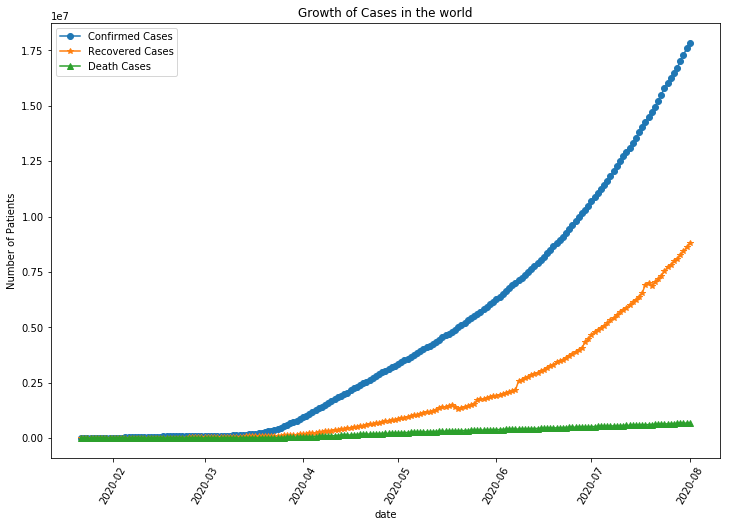

In [31]:
plt.figure(figsize=(12,8))
plt.plot(datewise["Confirmed"],marker="o",label="Confirmed Cases")
plt.plot(datewise["Recovered"],marker="*",label="Recovered Cases")
plt.plot(datewise["Deaths"],marker="^",label="Death Cases")
plt.ylabel("Number of Patients")
plt.xlabel("date")
plt.xticks(rotation=60)
plt.title("Growth of Cases in the world")
plt.legend()

From the above line graph, we can see that confirmed cases are highly increased, between March and April there is a 
rapid increase in cases.

Up to the middle of May, recovery cases are slightly increased, then it started increasing rapidly which is a good news.

Coming to the death case there is no sudden rise, cases are almost constant.

In [32]:
df1=df.groupby('Date').sum()
df1.reset_index(inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



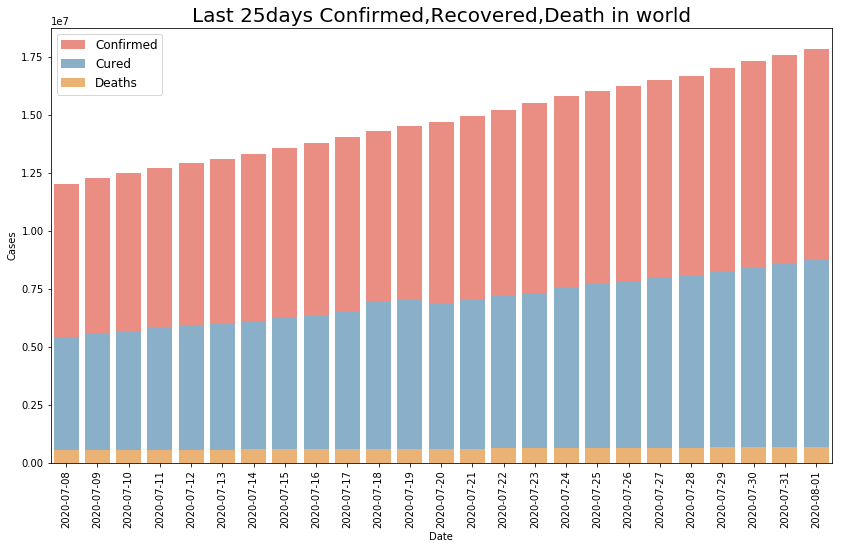

In [33]:
# Last 25 days cases
df2=df1.tail(25)
df2['Date'] = df2['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
plt.figure(figsize=(14,8))
sns.barplot(data=df2,x='Date',y='Confirmed',color=sns.color_palette('Set3')[3],label='Confirmed')
sns.barplot(data=df2,x='Date',y='Recovered',color=sns.color_palette('Set3')[4],label='Cured')
sns.barplot(data=df2,x='Date',y='Deaths',color=sns.color_palette('Set3')[5],label='Deaths')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.xticks(rotation = 90)
plt.title("Last 25days Confirmed,Recovered,Death in world",fontsize=20)
plt.legend(frameon=True,fontsize=12)

In [34]:
Recovered_rate=(sorted_By_Confirmed['Recovered']*100)/sorted_By_Confirmed['Confirmed']
Deaths_rate=(sorted_By_Confirmed['Deaths']*100)/sorted_By_Confirmed['Confirmed']
cases_rate=(sorted_By_Confirmed.Confirmed*100)/world_Confirmed_Total

sorted_By_Confirmed['Active']=sorted_By_Confirmed['Confirmed']-sorted_By_Confirmed['Deaths']-sorted_By_Confirmed['Recovered']
sorted_By_Confirmed['Recovered Cases Rate %']=pd.DataFrame(Recovered_rate)
sorted_By_Confirmed['Deaths Cases Rate %']=pd.DataFrame(Deaths_rate)
sorted_By_Confirmed['Total Cases Rate %']=pd.DataFrame(cases_rate)


print("Sorted By Confirmed Cases")
sorted_By_Confirmed.style.background_gradient(cmap='Reds')

Sorted By Confirmed Cases


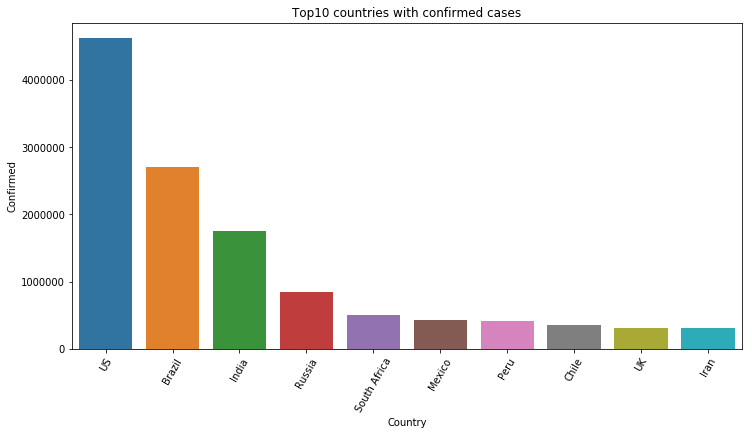

In [35]:
# Confirmed cases in top 10 Countries
plt.figure(figsize=(12,6))
plt.title("Top10 countries with confirmed cases")
plt.xticks(rotation=60)
sns.barplot(x='Country',y='Confirmed',data=sorted_By_Confirmed.head(10))

Here the US having the highest cases among all the countries followed by Brazile, India, Russia etc…...

We can observe top4 countries from the above graph, there is a large difference in the confirmed cases of the countries. 

The remaining countries are having an almost similar count of cases.


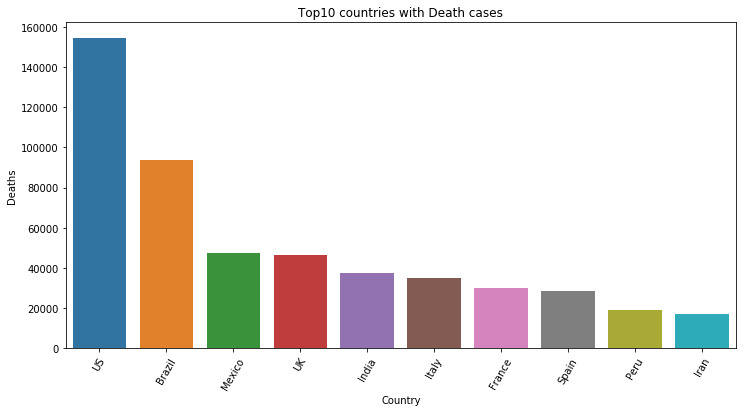

In [36]:
# Death cases in top 10 Countries
plt.figure(figsize=(12,6))
plt.title("Top10 countries with Death cases")
plt.xticks(rotation=60)
sns.barplot(x='Country',y='Deaths',data=sorted_By_Deaths.head(10))

Even in death cases also the US is at the top of the graph among all the countries followed by Brazile, Mexico, UK, etc…...

In the first 2 countries from the above graph, there is a large difference in the Death cases.

The remaining countries are having below 50000 deaths.


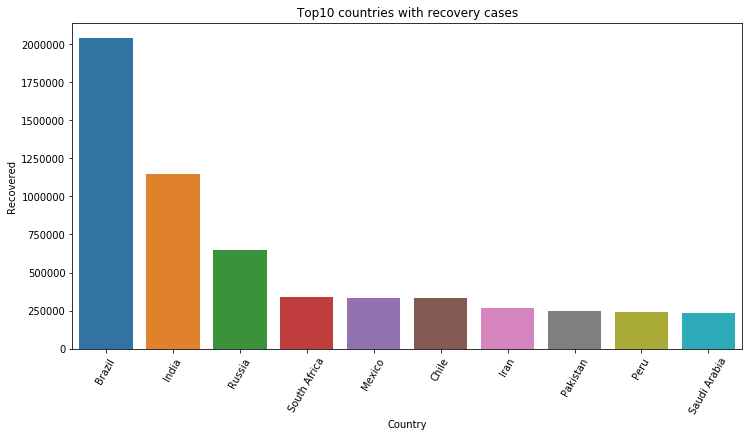

In [37]:
# Recovery cases in top 10 Countries
plt.figure(figsize=(12,6))
plt.title("Top10 countries with recovery cases")
plt.xticks(rotation=60)
sns.barplot(x='Country',y='Recovered',data=sorted_By_Recoveries.head(10))

Here Brazil having the highest Recovery cases among all the countries. India is in the second position followed by Russia, South Africa….

We can observe the top3 countries from the above graph, there is a large difference in the Recovery cases of the countries.

The remaining countries are having below 500000 recoveries.


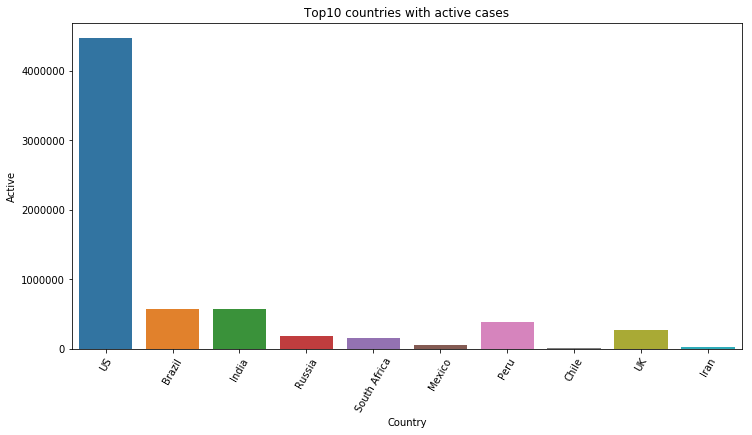

In [38]:
# Active cases in top 10 Countries
plt.figure(figsize=(12,6))
plt.title("Top10 countries with active cases")
plt.xticks(rotation=60)
sns.barplot(x='Country',y='Active',data=sorted_By_Confirmed.head(10))

The graph is about active cases countries around the world, where the US stands in the first position with the highest active case around 45 lakhs.

If we compare the remaining countries with the US, there is a huge difference in cases.


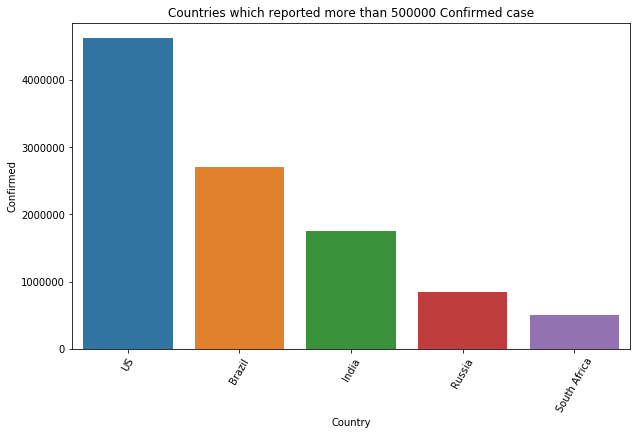

In [39]:
# Countries above 50k confirmed cases
plt.figure(figsize=(10,6))
plt.title('Countries which reported more than 500000 Confirmed case')
plt.xticks(rotation=60)
con=sorted_By_Confirmed[sorted_By_Confirmed['Confirmed']>500000]
sns.barplot(data=con, x='Country', y='Confirmed')


# Covid analysis on India

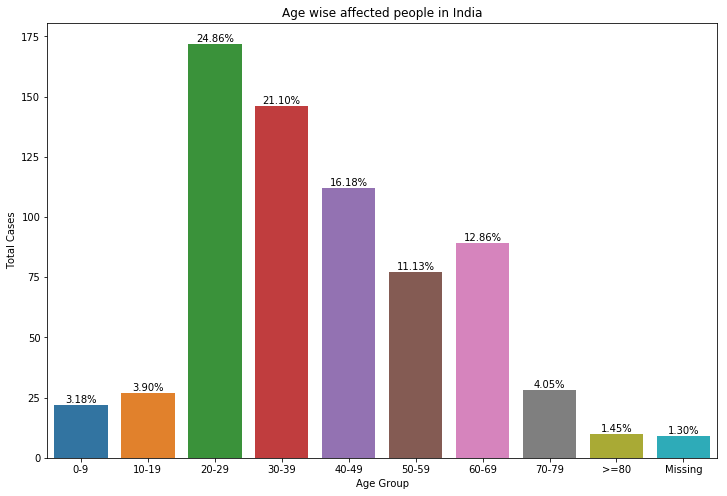

In [40]:
#  Agewise affected people in India
plt.figure(figsize=(12,8))
sns.barplot(data=ageGroup,x='AgeGroup',y='TotalCases',)
plt.title('Age wise affected people in India')
plt.xlabel('Age Group')
plt.ylabel('Total Cases')
for i in range(ageGroup.shape[0]):
    count = ageGroup.iloc[i]['TotalCases']
    plt.text(i,count+1,ageGroup.iloc[i]['Percentage'],ha='center')

In this plot according to the age the most affected people are in the age group of 20-29 (24.86%) and 30-39 (21.10%).

The people below the age of 20 and above 70 are less affected and there is 1.30% of missing age of cases.


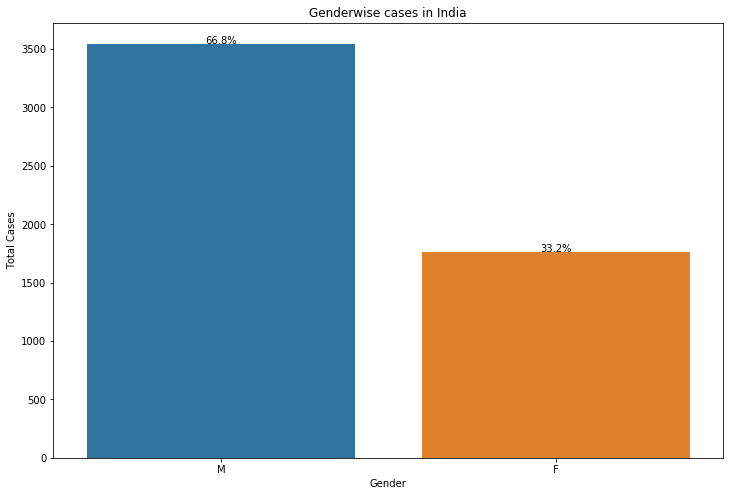

In [41]:
plt.figure(figsize=(12,8))
sns.countplot(data=indiDetails,x='gender',order=indiDetails['gender'].value_counts().index)
plt.title('Genderwise cases in India')
plt.xlabel('Gender')
plt.ylabel('Total Cases')
order2 = indiDetails['gender'].value_counts()

for i in range(order2.shape[0]):
    count = order2[i]
    strt='{:0.1f}%'.format(100*count / indiDetails.gender.dropna().count() )
    plt.text(i,count+2,strt,ha='center')

If we see the above graph the number of affected people concerning gender is mostly males with 66.8% and females are half of them.


In [42]:
india=sorted_By_Confirmed[sorted_By_Confirmed['Country']=='India']

In [43]:
india_con=india['Confirmed'].sum()
india_rec=india['Recovered'].sum()
india_dea=india['Deaths'].sum()
india_Active=india_con-india_dea-india_rec
india_rec_rate=(int(india['Recovered'].values)*100)/int(india['Confirmed'].values)
india_dea_rate=(int(india['Deaths'].values)*100)/int(india['Confirmed'].values)

india_tot={'Confirmed cases in india':india_con,'Death cases in india':india_dea,'Recovered cases in india':india_rec,
           'Active Cases':india_Active,'Rate of Recovered Cases %':india_rec_rate,'Rate of Deaths Cases %':india_dea_rate}
#india_tot=pd.DataFrame.from_dict(india_tot, orient='index' ,columns=['Total'])
india_tot

{'Confirmed cases in india': 1750723.0,
 'Death cases in india': 37364.0,
 'Recovered cases in india': 1145629.0,
 'Active Cases': 567730.0,
 'Rate of Recovered Cases %': 65.43747925856917,
 'Rate of Deaths Cases %': 2.1342039831543884}

From the above result, we have India wise confirmed, deaths, recoveries, and active cases. 

The no of recovery patients is going well with the recovery rate of 65%. We have a very low rate of deaths at 2.1%.

We can observe the cases of how they are increasing daily. If we see from the first
day the cases are gradually increasing every day.

In [44]:
covid19India['Date'] = pd.to_datetime(covid19India['Date'],dayfirst=True)
cind=covid19India.groupby('Date').sum()
cind.reset_index(inplace=True)

In [45]:
datewiseind=cind.groupby(["Date"]).agg({"Confirmed":'sum',"Cured":'sum',"Deaths":'sum'})

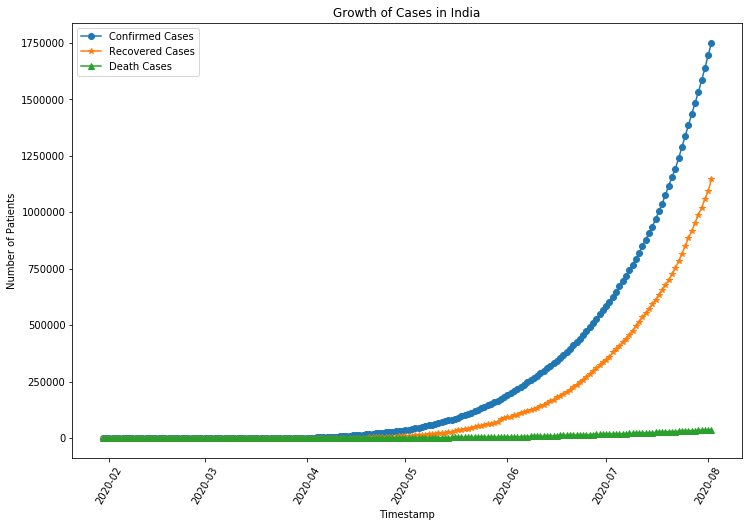

In [46]:
plt.figure(figsize=(12,8))
plt.plot(datewiseind["Confirmed"],marker="o",label="Confirmed Cases")
plt.plot(datewiseind["Cured"],marker="*",label="Recovered Cases")
plt.plot(datewiseind["Deaths"],marker="^",label="Death Cases")
plt.ylabel("Number of Patients")
plt.xlabel("Timestamp")
plt.xticks(rotation=60)
plt.title("Growth of Cases in India")
plt.legend()

From the figure, we can see that confirmed cases are highly increased from the month
of May.

Recovery cases started increasing rapidly from June and it is still increasing.

Coming to the death case there is no sudden rise, cases are almost constant.

In [47]:
df3=covid19India.groupby('Date').sum()
df3.reset_index(inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



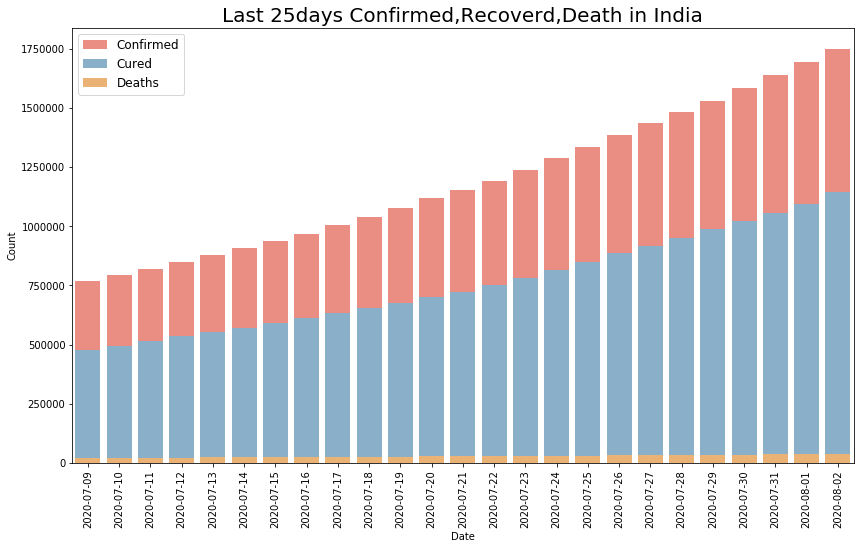

In [48]:
df4=df3.tail(25)
df4['Date'] = df4['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
plt.figure(figsize=(14,8))
sns.barplot(data=df4,x='Date',y='Confirmed',color=sns.color_palette('Set3')[3],label='Confirmed')
sns.barplot(data=df4,x='Date',y='Cured',color=sns.color_palette('Set3')[4],label='Cured')
sns.barplot(data=df4,x='Date',y='Deaths',color=sns.color_palette('Set3')[5],label='Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.title("Last 25days Confirmed,Recoverd,Death in India",fontsize=20)
plt.legend(frameon=True,fontsize=12)

In [49]:
confirmed_india=confirmed_df[confirmed_df['Country/Region']=='India']
confirmed_india

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20
131,NaN,India,20.593684,78.96288,0,0,0,0,0,0,...,1288108,1337024,1385635,1435616,1480073,1531669,1581963,1634746,1695988,1750723


In [50]:
confirmed_india=confirmed_india.iloc[:,4:]
confirmed_india.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20
131,0,0,0,0,0,0,0,0,1,1,...,1288108,1337024,1385635,1435616,1480073,1531669,1581963,1634746,1695988,1750723


In [51]:
inddaily_cases=confirmed_india.sum(axis=0)
inddaily_cases.head(10)

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
1/27/20    0
1/28/20    0
1/29/20    0
1/30/20    1
1/31/20    1
dtype: int64

In [52]:
inddaily_cases=inddaily_cases.diff().fillna(daily_cases[0]).astype(np.int64)
inddaily_cases.tail(10)

7/23/20    49310
7/24/20    48916
7/25/20    48611
7/26/20    49981
7/27/20    44457
7/28/20    51596
7/29/20    50294
7/30/20    52783
7/31/20    61242
8/1/20     54735
dtype: int64

In [53]:
state_cases=covid19India.groupby('State')['Confirmed','Deaths','Cured'].max().reset_index()

In [54]:
state_cases=state_cases[state_cases.State!='Telengana']
state_cases=state_cases[state_cases.State!='Telengana***']
state_cases=state_cases[state_cases.State!='Telangana***']

In [55]:
'''Recovered_rate=(state_cases['Cured']*100)/state_cases['Confirmed']
Deaths_rate=(state_cases['Deaths']*100)/state_cases['Confirmed']
cases_rate=(state_cases.Confirmed*100)/india_con

state_cases['Active']=state_cases['Confirmed']-state_cases['Deaths']-state_cases['Cured']
state_cases['Recovered Cases Rate %']=pd.DataFrame(Recovered_rate)
state_cases['Deaths Cases Rate %']=pd.DataFrame(Deaths_rate)
state_cases['Total Cases Rate %']=pd.DataFrame(cases_rate)


print("state_cases")
state_cases.style.background_gradient(cmap='Reds')'''

'Recovered_rate=(state_cases[\'Cured\']*100)/state_cases[\'Confirmed\']\nDeaths_rate=(state_cases[\'Deaths\']*100)/state_cases[\'Confirmed\']\ncases_rate=(state_cases.Confirmed*100)/india_con\n\nstate_cases[\'Active\']=state_cases[\'Confirmed\']-state_cases[\'Deaths\']-state_cases[\'Cured\']\nstate_cases[\'Recovered Cases Rate %\']=pd.DataFrame(Recovered_rate)\nstate_cases[\'Deaths Cases Rate %\']=pd.DataFrame(Deaths_rate)\nstate_cases[\'Total Cases Rate %\']=pd.DataFrame(cases_rate)\n\n\nprint("state_cases")\nstate_cases.style.background_gradient(cmap=\'Reds\')'

In [56]:
state_cases['Active'] = state_cases['Confirmed'] - abs((state_cases['Deaths']- state_cases['Cured']))
state_cases["Death Rate (per 100)"] = np.round(100*state_cases["Deaths"]/state_cases["Confirmed"],2)
state_cases["Cure Rate (per 100)"] = np.round(100*state_cases["Cured"]/state_cases["Confirmed"],2)
sc=state_cases.sort_values('Confirmed', ascending= False).fillna(0).style.background_gradient(cmap='Reds',subset=["Confirmed"])\
                        .background_gradient(cmap='Blues',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Cured"])\
                        .background_gradient(cmap='Purples',subset=["Active"])\
                        .background_gradient(cmap='Greys',subset=["Death Rate (per 100)"])\
                        .background_gradient(cmap='Oranges',subset=["Cure Rate (per 100)"])
sc

,State,Confirmed,Deaths,Cured,Active,Death Rate (per 100),Cure Rate (per 100)
22,Maharashtra,431719,15316,266883,180152,3.55,61.82
32,Tamil Nadu,251738,4034,190966,64806,1.6,75.86
1,Andhra Pradesh,150209,1407,76614,75002,0.94,51
11,Delhi,136716,3989,122131,18574,2.92,89.33
18,Karnataka,129287,2412,53648,78051,1.87,41.5
39,Uttar Pradesh,89048,1677,51334,39391,1.88,57.65
41,West Bengal,72777,1629,50517,23889,2.24,69.41
13,Gujarat,62463,2464,45699,19228,3.94,73.16
4,Bihar,54240,309,34994,19555,0.57,64.52
33,Telangana,54059,463,41332,13190,0.86,76.46


In [57]:
b= covid19India.groupby(["Date","State"])[['Date','State','Confirmed','Deaths','Cured']].sum().reset_index()
b=b[b.State!='Telengana']
b=b[b.State!='Telengana***']
b=b[b.State!='Telangana***']

In [58]:
sorted_By_Confirmed=b.sort_values('Confirmed',ascending=False)
sorted_By_Confirmed=sorted_By_Confirmed.drop_duplicates('State')
sorted_By_Deaths=b.sort_values('Deaths',ascending=False)
sorted_By_Deaths=sorted_By_Deaths.drop_duplicates('State')
sorted_By_Recoveries=b.sort_values('Cured',ascending=False)
sorted_By_Recoveries=sorted_By_Recoveries.drop_duplicates('State')


In [59]:
sorted_By_active=state_cases.sort_values('Active',ascending=False)
sorted_By_active=sorted_By_active.drop_duplicates('State')

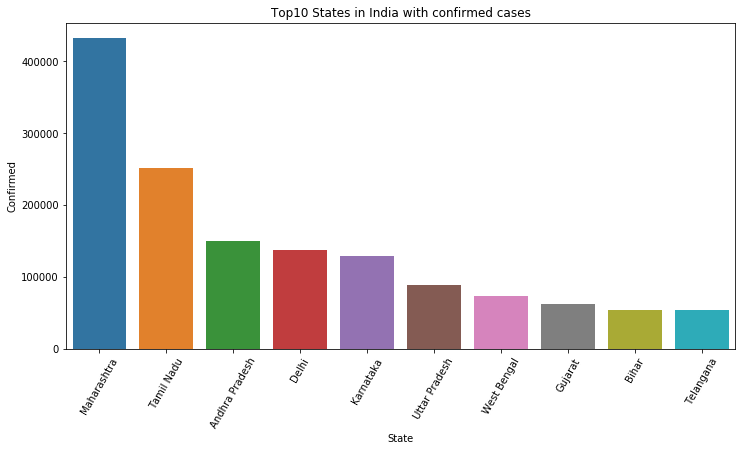

In [60]:
plt.figure(figsize=(12,6))
plt.title("Top10 States in India with confirmed cases")
plt.xticks(rotation=60)
sns.barplot(x='State',y='Confirmed',data=sorted_By_Confirmed.head(10))

The above histogram shows the confirmed cases of the top10 states in India. Here xaxis
represents the state and y-axis representing confirmed cases count.

Maharashtra is in the first position followed by Tamil Nadu, AP, Delhi etc…...

In this top10 states, the last 3 states Gujarat, Bihar, and Telangana are having below 1
lakh confirmed cases.

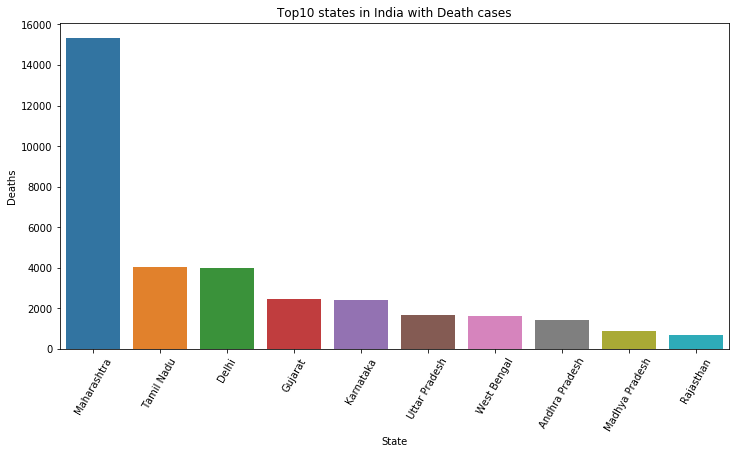

In [61]:
plt.figure(figsize=(12,6))
plt.title("Top10 states in India with Death cases")
plt.xticks(rotation=60)
sns.barplot(x='State',y='Deaths',data=sorted_By_Deaths.head(10))

From this plot the top10 states with death cases in India. Here x-axis represents the
state and y-axis representing death cases count. 

Maharashtra is in the first position followed by Tamil Nadu, Delhi etc…...and it has a
huge difference in the deaths compare to remaining states.

In this top10 states, the last 3 states AP, MP, and Rajasthan are having below 2000
death cases.

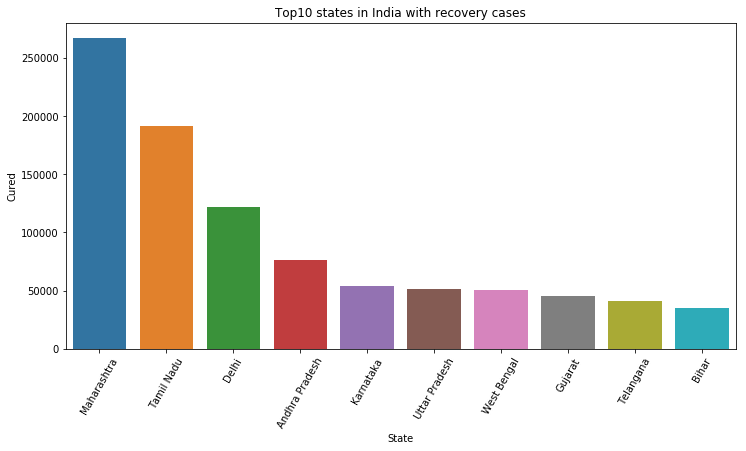

In [62]:
plt.figure(figsize=(12,6))
plt.title("Top10 states in India with recovery cases")
plt.xticks(rotation=60)
sns.barplot(x='State',y='Cured',data=sorted_By_Recoveries.head(10))

The above histogram shows the recovery cases of the top10 states in India. Here xaxis
represents the state and y-axis representing recovery cases count.

Maharashtra is in the first position followed by Tamil Nadu, Delhi, AP etc…...

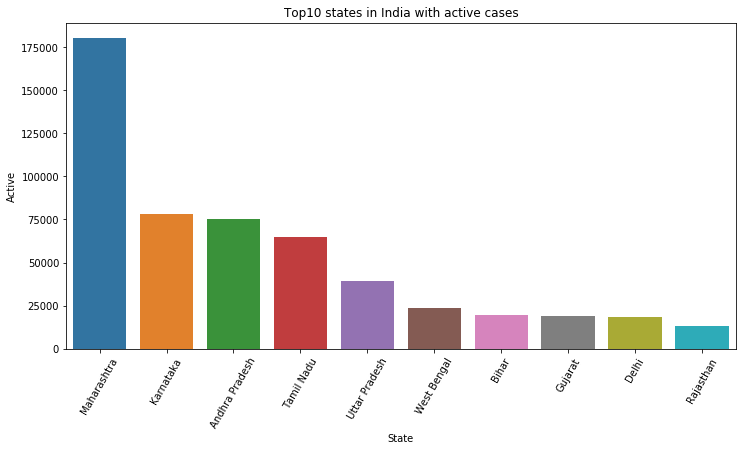

In [63]:
plt.figure(figsize=(12,6))
plt.title("Top10 states in India with active cases")
plt.xticks(rotation=60)
sns.barplot(x='State',y='Active',data=sorted_By_active.head(10))

The above graph is about active cases states in India, where the Maharastra stands in
the first position with the highest active case around 15 lakhs.

If we compare the remaining states with the Maharastra, there is a huge difference in
cases.

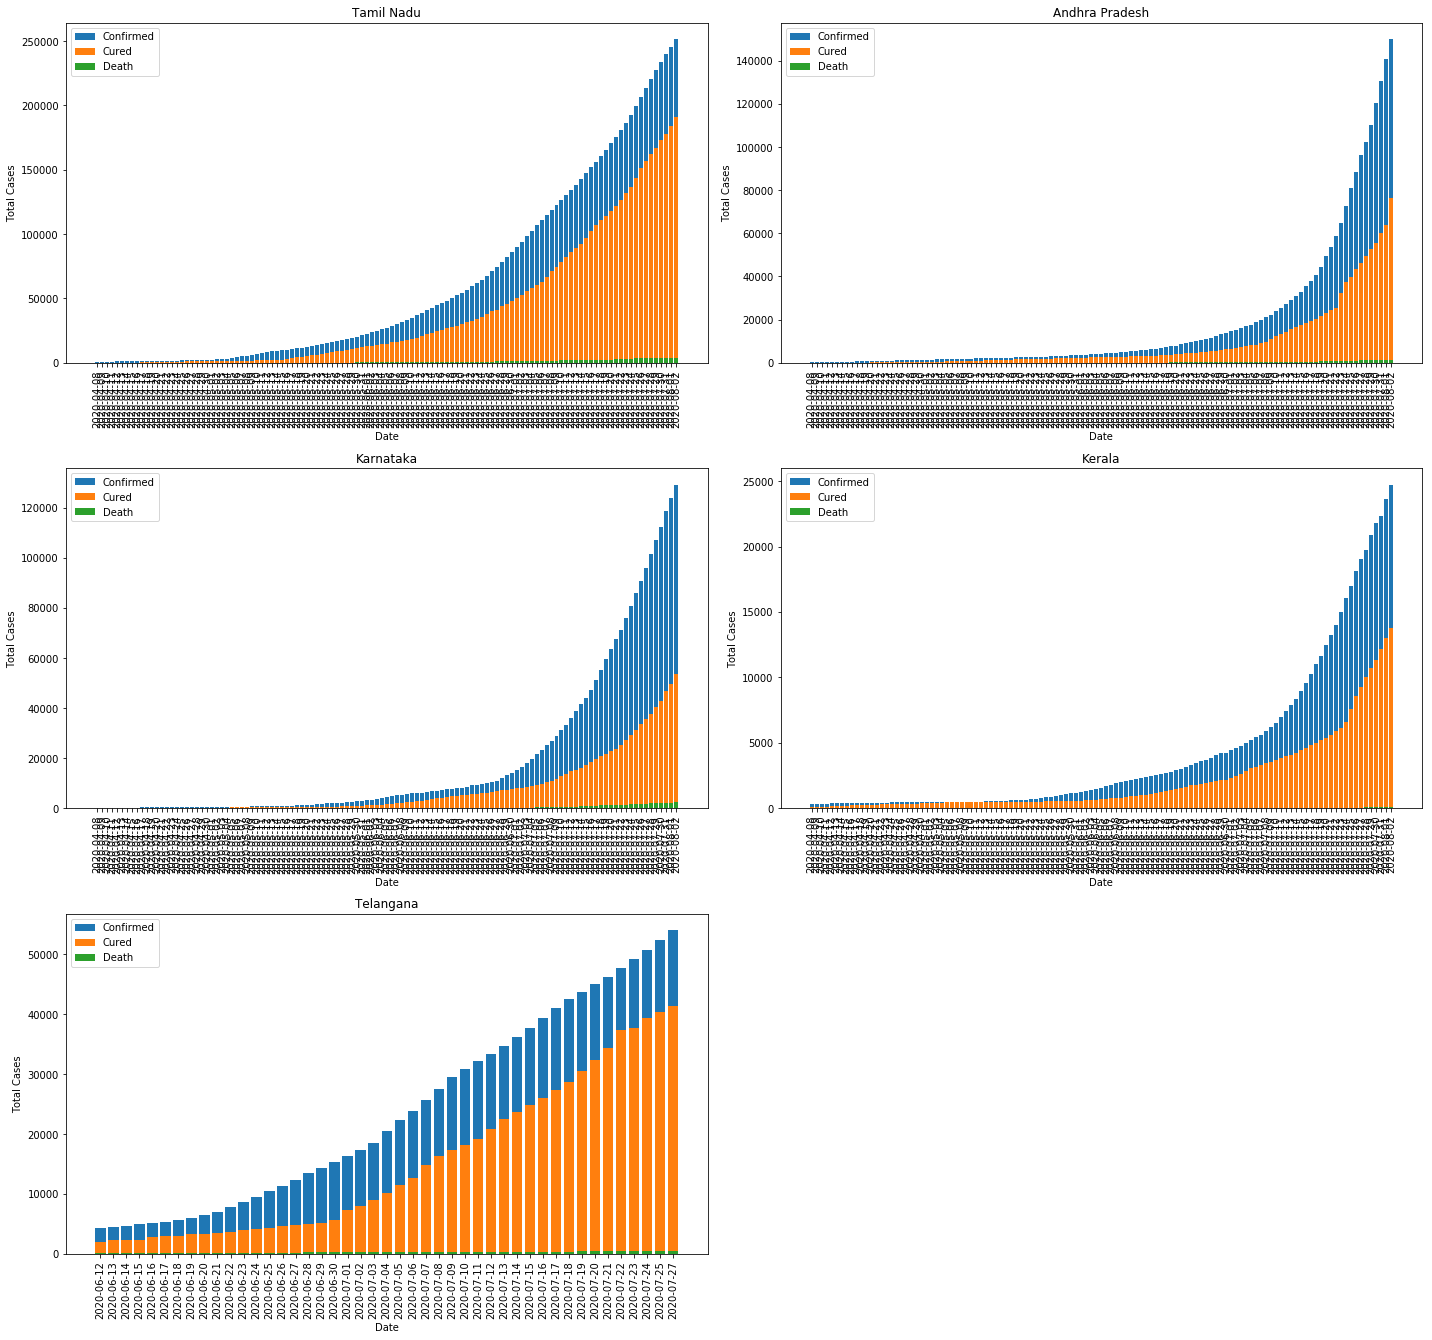

In [64]:
states_list=['Tamil Nadu','Andhra Pradesh','Karnataka','Kerala','Telangana']
df5=covid19India[covid19India['Date']>'2020-04-07']
df5=df5.groupby(['Date','State']).sum()
df5.reset_index(inplace=True)
df5['Date'] = df5['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
plt.figure(figsize=(20,30))

for i,state in enumerate(states_list):
    plt.subplot(5,2,i+1)
    df4=df5[df5['State']==state]
    plt.bar(df4.Date,df4.Confirmed,label='Confirmed')
    plt.bar(df4.Date,df4.Cured,label='Cured')
    plt.bar(df4.Date,df4.Deaths,label='Death')
    plt.xticks(rotation=90)
    plt.title(state)
    plt.ylabel('Total Cases')
    plt.xlabel('Date')
    plt.legend()
plt.tight_layout()
plt.show()

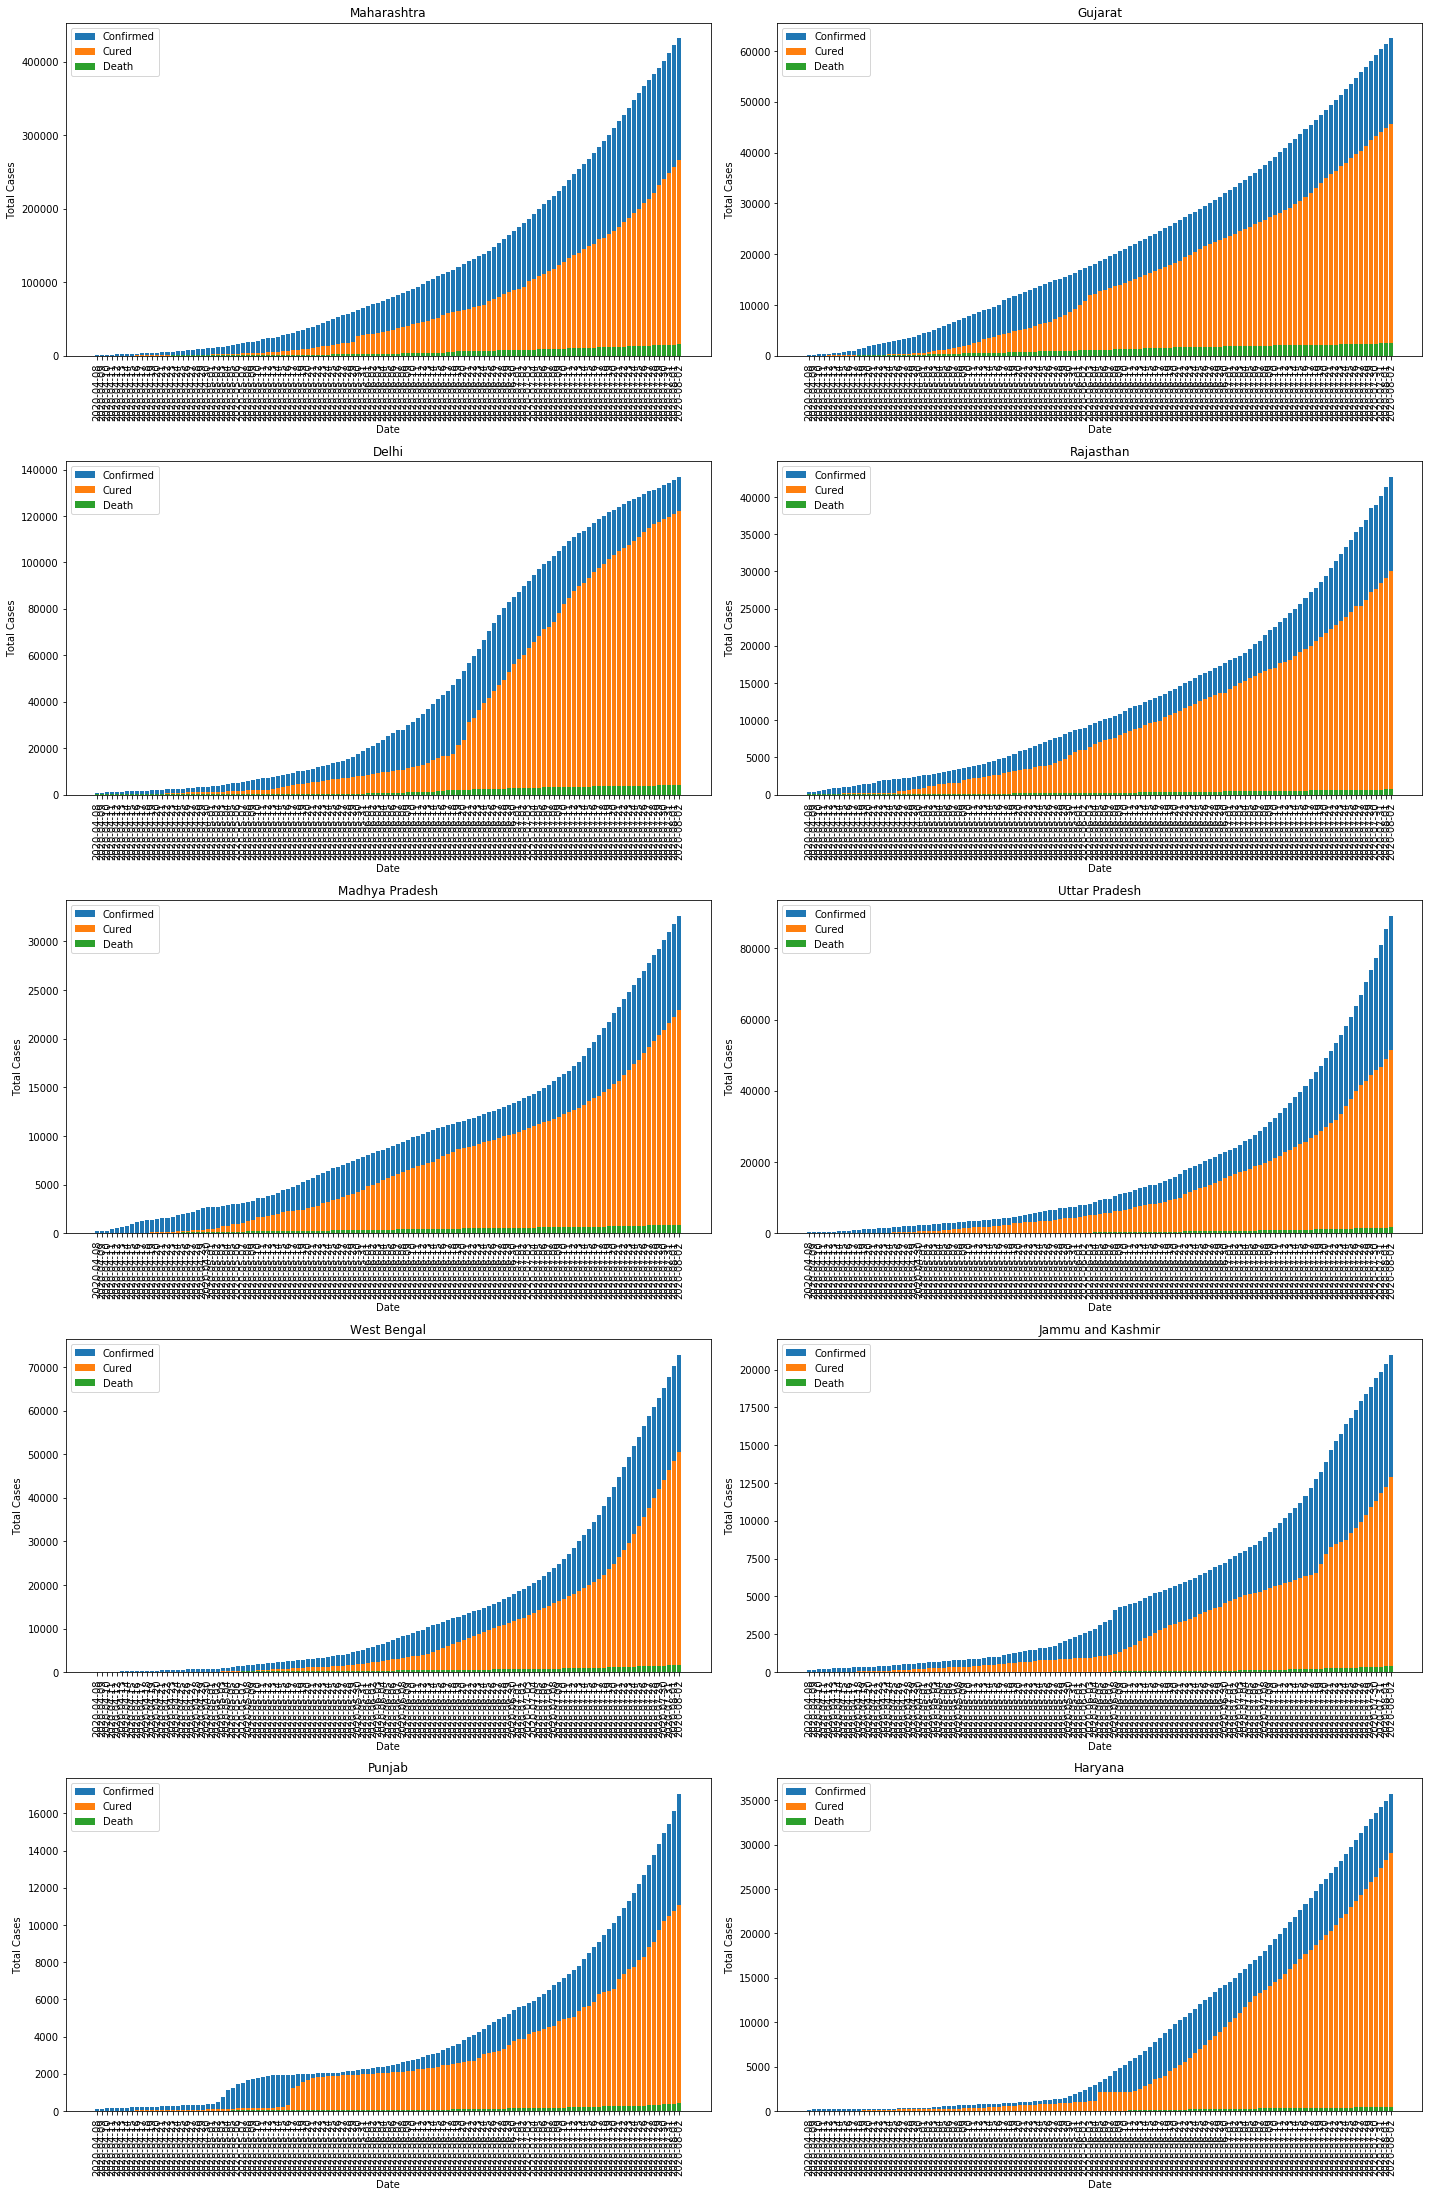

In [65]:
states_list=['Maharashtra','Gujarat','Delhi','Rajasthan','Madhya Pradesh','Uttar Pradesh',
            'West Bengal','Jammu and Kashmir','Punjab','Haryana']
df5=covid19India[covid19India['Date']>'2020-04-07']
df5=df5.groupby(['Date','State']).sum()
df5.reset_index(inplace=True)
df5['Date'] = df5['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
plt.figure(figsize=(20,60))

for i,state in enumerate(states_list):
    plt.subplot(10,2,i+1)
    df4=df5[df5['State']==state]
    plt.bar(df4.Date,df4.Confirmed,label='Confirmed')
    plt.bar(df4.Date,df4.Cured,label='Cured')
    plt.bar(df4.Date,df4.Deaths,label='Death')
    plt.xticks(rotation=90)
    plt.title(state)
    plt.ylabel('Total Cases')
    plt.xlabel('Date')
    plt.legend()
plt.tight_layout()
plt.show()

In [66]:
hospital_beds =hospital_beds.drop([36])
cols_object = list(hospital_beds.columns[2:8])

for cols in cols_object:
    hospital_beds[cols] = hospital_beds[cols].astype(int,errors = 'ignore')

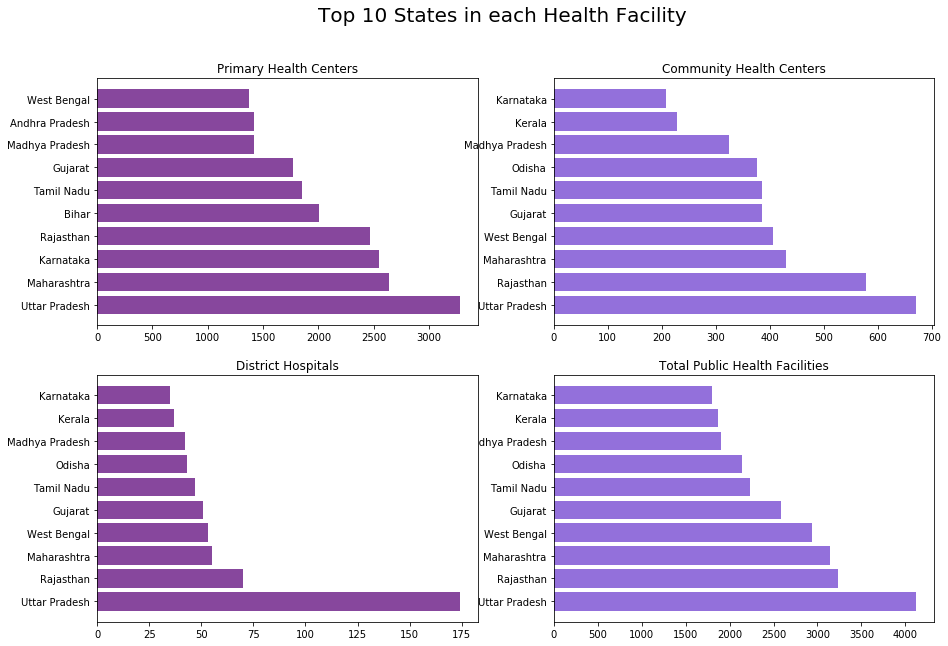

In [67]:
top_10_primary = hospital_beds.nlargest(10,'NumPrimaryHealthCenters_HMIS')
top_10_community = hospital_beds.nlargest(10,'NumCommunityHealthCenters_HMIS')
top_10_district_hospitals = hospital_beds.nlargest(10,'NumDistrictHospitals_HMIS')
top_10_public_facility = hospital_beds.nlargest(10,'TotalPublicHealthFacilities_HMIS')
top_10_public_beds = hospital_beds.nlargest(10,'NumPublicBeds_HMIS')

plt.figure(figsize=(15,10))
plt.suptitle('Top 10 States in each Health Facility',fontsize=20)
plt.subplot(221)
plt.title('Primary Health Centers')
plt.barh(top_10_primary['State/UT'],top_10_primary['NumPrimaryHealthCenters_HMIS'],color ='#87479d');

plt.subplot(222)
plt.title('Community Health Centers')
plt.barh(top_10_community['State/UT'],top_10_community['NumCommunityHealthCenters_HMIS'],color = '#9370db');

plt.subplot(224)
plt.title('Total Public Health Facilities')
plt.barh(top_10_community['State/UT'],top_10_public_facility['TotalPublicHealthFacilities_HMIS'],color='#9370db');

plt.subplot(223)
plt.title('District Hospitals')
plt.barh(top_10_community['State/UT'],top_10_district_hospitals['NumDistrictHospitals_HMIS'],color = '#87479d');


From this figure, we noticed that Uttar Pradesh having the highest facilities in all
sectors (PHC, CHC, DH, & TPHF).

Except PHC Rajasthan has placed in the second position in all sectors.

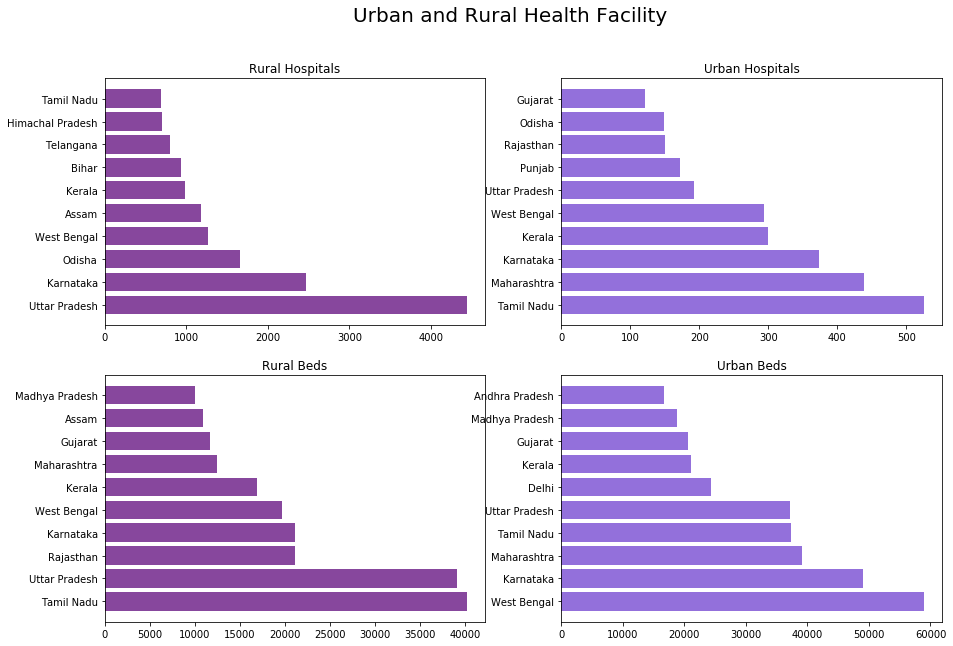

In [68]:
top_rural_hos = hospital_beds.nlargest(10,'NumRuralHospitals_NHP18')
top_rural_beds = hospital_beds.nlargest(10,'NumRuralBeds_NHP18')
top_urban_hos = hospital_beds.nlargest(10,'NumUrbanHospitals_NHP18')
top_urban_beds = hospital_beds.nlargest(10,'NumUrbanBeds_NHP18')

plt.figure(figsize=(15,10))
plt.suptitle('Urban and Rural Health Facility',fontsize=20)
plt.subplot(221)
plt.title('Rural Hospitals')
plt.barh(top_rural_hos['State/UT'],top_rural_hos['NumRuralHospitals_NHP18'],color = '#87479d');

plt.subplot(222)
plt.title('Urban Hospitals')
plt.barh(top_urban_hos['State/UT'],top_urban_hos['NumUrbanHospitals_NHP18'],color = '#9370db');

plt.subplot(223)
plt.title('Rural Beds')
plt.barh(top_rural_beds['State/UT'],top_rural_beds['NumRuralBeds_NHP18'],color = '#87479d');

plt.subplot(224)
plt.title('Urban Beds')
plt.barh(top_urban_beds['State/UT'],top_urban_beds['NumUrbanBeds_NHP18'],color = '#9370db');

In the case of rural hospitals UP is in top position. Tamil Nadu is in the tenth position
in rural, whereas in urban hospitals Tamil Nadu is on top. 

Compare to urban hospitals and beds rural has more hospitals and beds

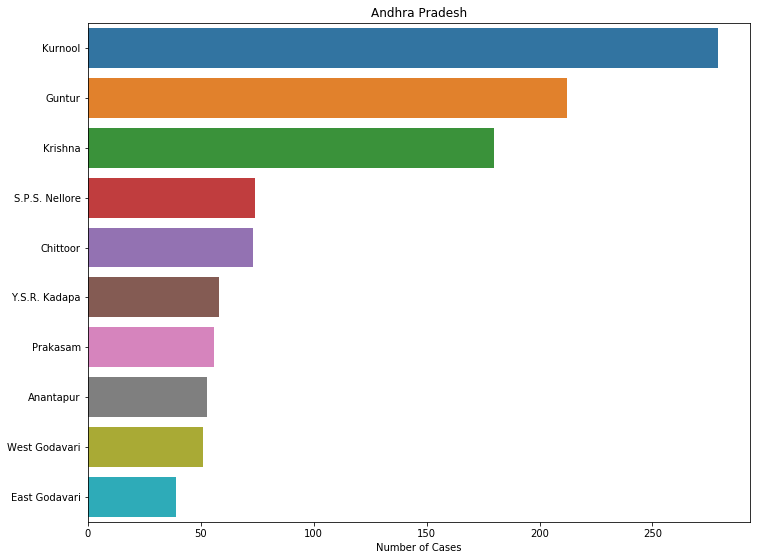

In [69]:
# cases in AP states
df3=indiDetails.groupby(['detected_state','detected_district']).count()
df3.reset_index(inplace=True)
states_list=['Andhra Pradesh']
plt.figure(figsize=(20,60))
for i,state in enumerate(states_list):
    plt.subplot(8,2,i+1)
    df4=df3[df3['detected_state']==state].sort_values('id',ascending=False)
    df4=df4.head(10)
    sns.barplot(data=df4,x='id',y='detected_district')
    plt.xlabel('Number of Cases')
    plt.ylabel('')
    plt.title(state)
plt.tight_layout()
plt.show()

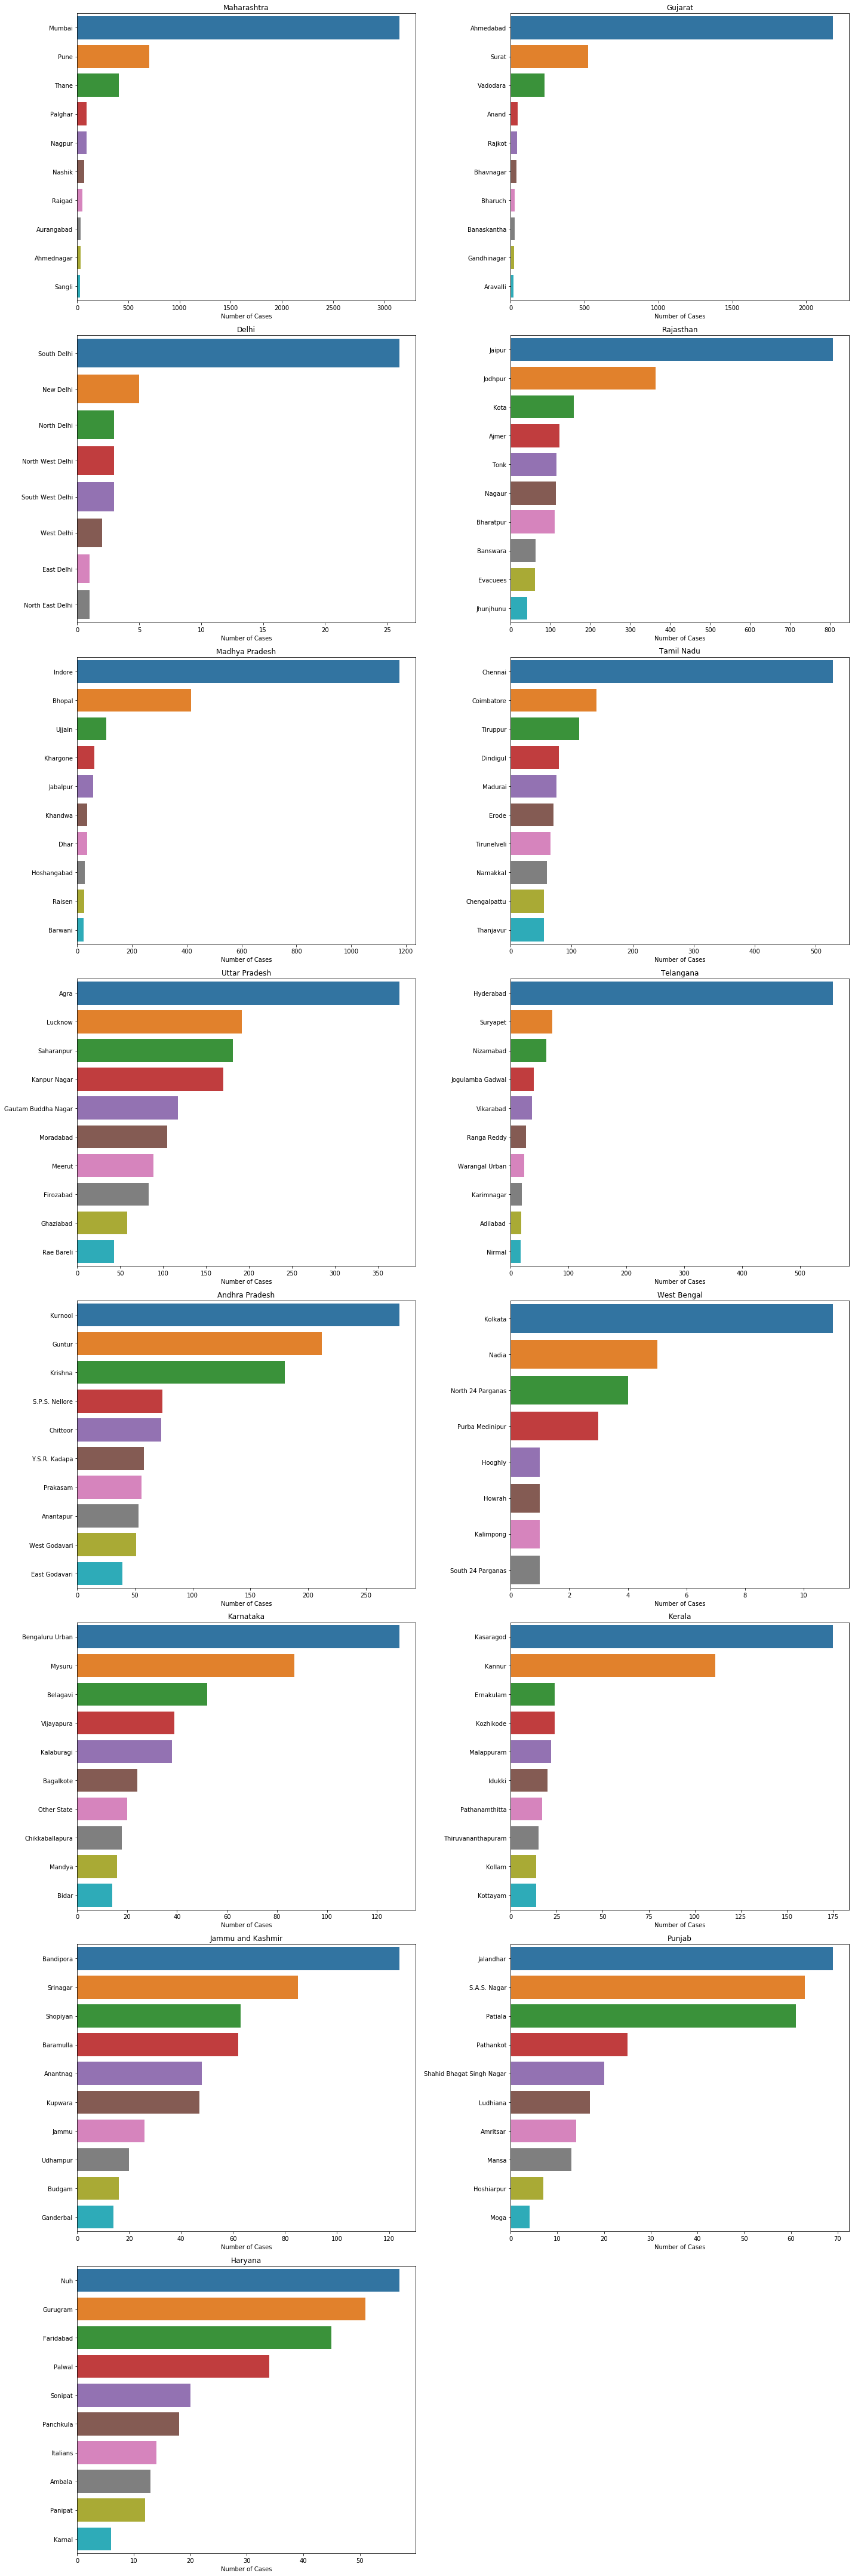

In [70]:
# Cases in each state
df3=indiDetails.groupby(['detected_state','detected_district']).count()
df3.reset_index(inplace=True)
states_list=['Maharashtra','Gujarat','Delhi','Rajasthan','Madhya Pradesh','Tamil Nadu','Uttar Pradesh','Telangana','Andhra Pradesh',
            'West Bengal','Karnataka','Kerala','Jammu and Kashmir','Punjab','Haryana']
plt.figure(figsize=(20,60))
for i,state in enumerate(states_list):
    plt.subplot(8,2,i+1)
    df4=df3[df3['detected_state']==state].sort_values('id',ascending=False)
    df4=df4.head(10)
    sns.barplot(data=df4,x='id',y='detected_district')
    plt.xlabel('Number of Cases')
    plt.ylabel('')
    plt.title(state)
plt.tight_layout()
plt.show()

In [71]:
df3

,detected_state,detected_district,id,government_id,diagnosed_date,age,gender,detected_city,nationality,current_status,status_change_date,notes
0,Andaman and Nicobar Islands,North and Middle Andaman,1,1,1,1,1,0,1,1,1,1
1,Andaman and Nicobar Islands,South Andaman,32,1,32,2,4,1,6,32,32,32
2,Andhra Pradesh,Anantapur,53,17,53,17,17,17,0,53,53,49
3,Andhra Pradesh,Chittoor,73,21,73,21,21,14,1,73,73,69
4,Andhra Pradesh,East Godavari,39,15,39,15,15,9,1,39,39,37
5,Andhra Pradesh,Guntur,212,99,212,98,99,83,2,212,211,200
6,Andhra Pradesh,Krishna,180,35,180,33,35,21,3,180,179,166
7,Andhra Pradesh,Kurnool,279,91,279,91,91,88,0,279,278,256
8,Andhra Pradesh,Prakasam,56,36,56,36,36,33,1,56,56,51
9,Andhra Pradesh,S.P.S. Nellore,74,42,74,42,42,25,1,74,73,37


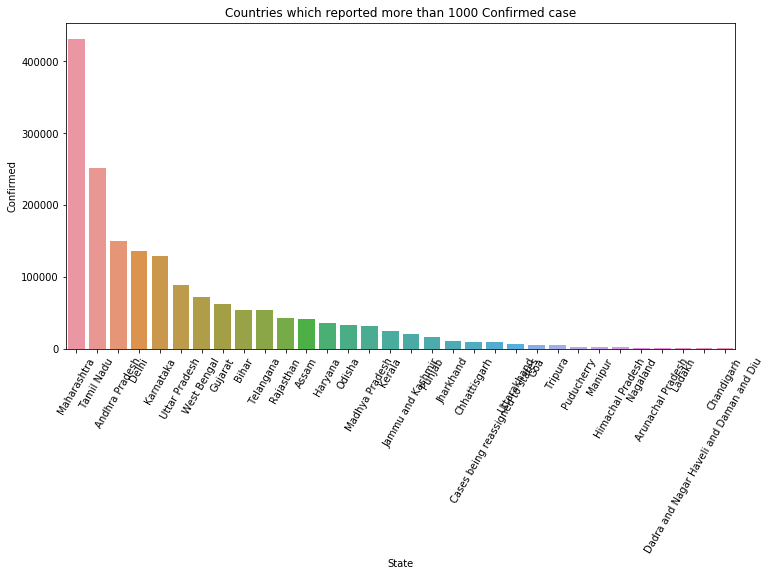

In [72]:
plt.figure(figsize=(12,6))
plt.title('Countries which reported more than 1000 Confirmed case')
plt.xticks(rotation=60)
con=sorted_By_Confirmed[sorted_By_Confirmed['Confirmed']>1000]
sns.barplot(data=con, x='State', y='Confirmed')

In [73]:
symptoms={'symptom':['Fever','Dry cough','Fatigue','Sputum production','Shortness of breath','Muscle pain','Sore throat',
        'Headache','Chills','Nausea or vomiting','Nasal congestion','Diarrhoea','Haemoptysis',
        'Conjunctival congestion'],'percentage':[87.9,67.7,38.1,33.4,18.6,14.8,13.9,13.6,11.4,5.0,4.8,3.7,0.9,0.8]}

symptoms=pd.DataFrame(data=symptoms,index=range(14))
symptoms

,symptom,percentage
0,Fever,87.9
1,Dry cough,67.7
2,Fatigue,38.1
3,Sputum production,33.4
4,Shortness of breath,18.6
5,Muscle pain,14.8
6,Sore throat,13.9
7,Headache,13.6
8,Chills,11.4
9,Nausea or vomiting,5.0
